# Kaggle Heart Disease UCI
- Author: Max Kuan
- Date: 2022.02.19
- Source: https://www.kaggle.com/ronitf/heart-disease-uci

## Description
This dataset will identify possible characteristics that might cause heart disease by identifying specific patterns from 13 different features. The features include age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic result (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), ST depression induced by exercise relative to rest (old peak), number of major vessels (ca) and defect (thal). Besides, this dataset had provided labels for heart disease patients. Hence, we can use supervised machine learning to identify future heart disease.

## Attribute Information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Before Start
**According to the description there are several features need to take care before using the dataset**
- cp: chest pain type (4 values)
- restecg: resting electrocardiographic results (values 0,1,2)
- fbs > 120 mg/dl
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- exercise induced angina (1 = yes; 0 = no)

Change the value in these column into desire format

In [2]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
condition = {"cp":{0:"L0", 1:"L1", 2:"L2", 3:"L3"}, 
             "restecg":{0:"L0", 1:"L1", 2:"L2"},
            "fbs":{0:"<120 mg/dl", 1: ">120 mg/dl"},
            "ca":{0:"N0", 1:"N1", 2:"N2", 3:"N3", 4:"N4"},
             "sex":{0:"Female", 1:"Male"},
             "exang":{0:"No",1:"Yes"},
             "slope":{0:"Normal", 1:"T1", 2:"T2"}
            }

In [6]:
data.replace(condition, inplace=True)

In [7]:
data['thal'] = np.where(data.thal <= 3, 'normal', np.where((data.thal > 3) & (data.thal <= 6), 'fixed_defect', 'reversable defect' ))

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,L3,145,233,>120 mg/dl,L0,150,No,2.3,Normal,N0,normal,1
1,37,Male,L2,130,250,<120 mg/dl,L1,187,No,3.5,Normal,N0,normal,1
2,41,Female,L1,130,204,<120 mg/dl,L0,172,No,1.4,T2,N0,normal,1
3,56,Male,L1,120,236,<120 mg/dl,L1,178,No,0.8,T2,N0,normal,1
4,57,Female,L0,120,354,<120 mg/dl,L1,163,Yes,0.6,T2,N0,normal,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [10]:
data.select_dtypes(include=[np.number]).columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target'], dtype='object')

In [11]:
def dataSummarize(data):
    """This function summarise the dataset info, including numerical or categorical features
       checking duplicate record and missing values
    """
    
    # Seperate Numerical and Categorical value
    numerical = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Check Anomolies, duplicate and missing values
    duplicate_num = data.duplicated().sum()
    duplicate_index = data[data.duplicated(keep=False)].index.tolist()
    
    missing = data.isna().sum()
    
    print(f"""
--------- Summarize --------------
Numerical features: {numerical}
Categorical features: {categorical}

--------- Duplicate --------------
How many duplicate records: {duplicate_num}
Where is the duplicate record occur: {duplicate_index}

--------- Missing ----------------
{missing}

""")
    return (numerical, categorical, duplicate_index)



In [12]:
numeric, category, duplicated = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

--------- Duplicate --------------
How many duplicate records: 1
Where is the duplicate record occur: [163, 164]

--------- Missing ----------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64




## Duplicated Records
There is one duplicated records occur in this dataset. Check the records before removed the record from the dataset

In [13]:
data.loc[duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,Male,L2,138,175,<120 mg/dl,L1,173,No,0.0,T2,N4,normal,1
164,38,Male,L2,138,175,<120 mg/dl,L1,173,No,0.0,T2,N4,normal,1


Drop duplicated records

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
numeric, category, duplicated = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

--------- Duplicate --------------
How many duplicate records: 0
Where is the duplicate record occur: []

--------- Missing ----------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64




## Check Correlation Between Features
**Postive Correlation**
- target:thalach
---

**Negative Correlation**
- thalach:oldpeak

<AxesSubplot:>

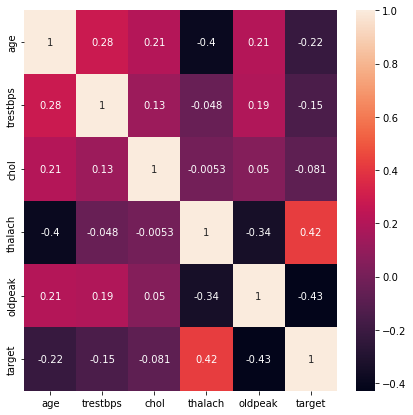

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(data=data.corr(), annot=True)

# Exploration Data Analysis

In [17]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


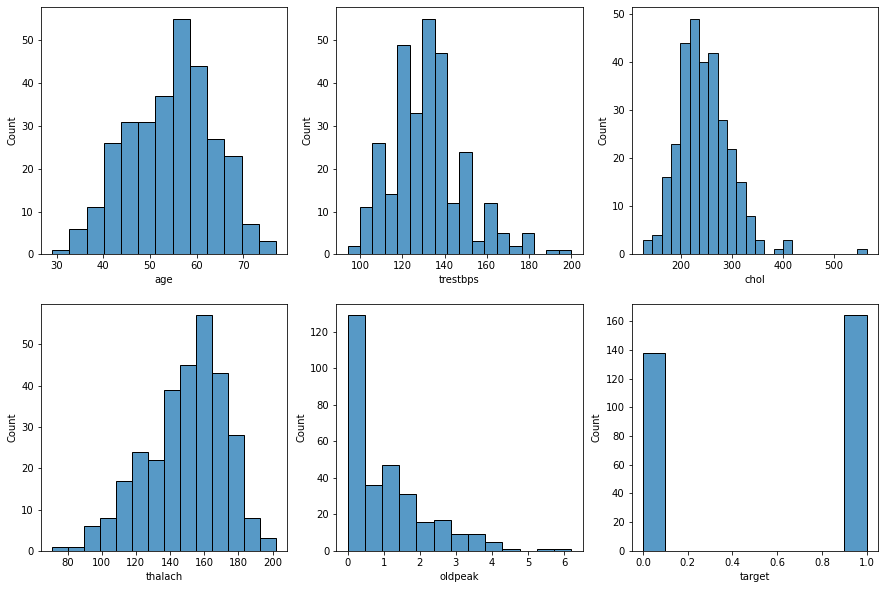

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for index, col in enumerate(numeric):
    sns.histplot(ax=axes[int(np.floor(index / 3)), index % 3], data=data, x=col)

In [19]:
data.describe(include=["O"])

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,1
top,Male,L0,<120 mg/dl,L1,No,T2,N0,normal
freq,206,143,257,151,203,141,175,302


1. This dataset has more male then female
2. L0 and L2 are the two major chest pain type in this dataset.
3. Most of the people have blood suger lower then 120 mg/dl
4. Half of the sample in this dataset had exercise.
5. All of the people don't have heart defect

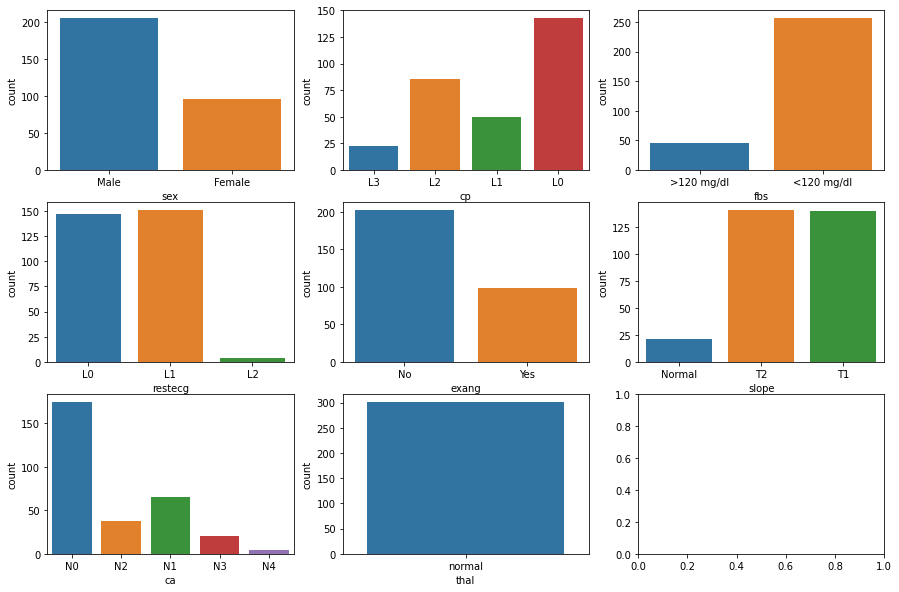

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for index, col in enumerate(category):
    sns.countplot(ax=axes[int(np.floor(index / 3)), index % 3], data=data, x=col)

## Drop Useless Features

In [21]:
data.drop("thal", axis=1, inplace=True)

## Step 2 Ask Question
After understand our problem. Now we need to setup several questions for us to understand the dataset better. First, we need to understand the corrleration between each features
1. Will Age effect heart disease?
2. Will heart disease have cause different chest type pain?
3. Blood sugar and heart disease?
4. High blood pressure lead to serve heart disease?
5. The slope of ST depressure will cause heart disease?
6. Will Rest ECG Level increase the incidence of heart disease?

**1. Will age affect the incidence of heart disease?**

The figure illustrate that younger people who had symptoms are more possible diganoise heart disease compare to elder people. 

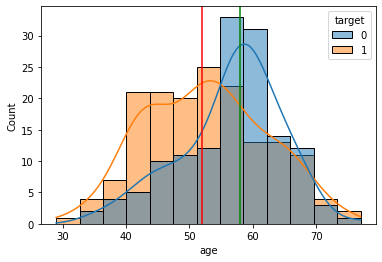

In [22]:
sns.histplot(data=data, x='age', hue='target', kde=True)
plt.axvline(np.median(data[data.target == 1].age), color='r')
plt.axvline(np.median(data[data.target == 0].age), color='g')

**2.Will heart disease have cause different chest type pain?**

In the bar chart below shows that most of the heart disease patients might have type 1, 2, 3 of chest pain. Type 2 chest pain is the major type of pain for heart disease patients. On the other have, if people have type 0 chest pain will have higher probability not having heart disease.

<AxesSubplot:title={'center':'Chest Pain vs Heart Disease'}, ylabel='target'>

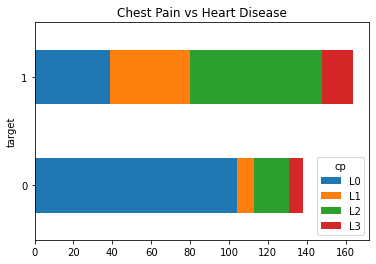

In [23]:
data.groupby(['target', 'cp']).size().unstack().plot(kind='barh', stacked=True, title="Chest Pain vs Heart Disease")

**3.Blood sugar and heart disease?**

There is no strong relation between blood sugar and heart disease. However, in realstic we usually think that high blood sugar are relate to heart disease. In fact, they did not have strong relationship according to this dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

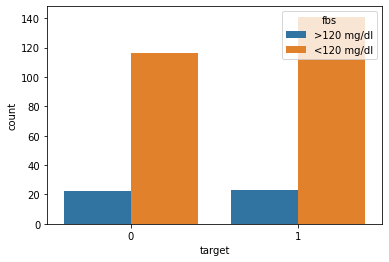

In [24]:
sns.countplot(data=data, x='target', hue='fbs')

**4.High blood pressure lead to serve heart disease?**

According to the figure below, there is not difference in blood pressure between healthy and heart disease people.

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

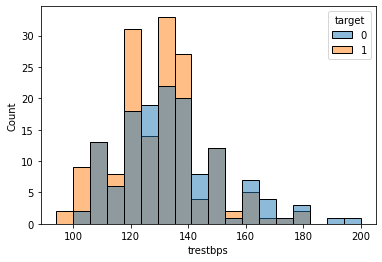

In [25]:
sns.histplot(data=data, x='trestbps', hue='target')

**5. The slope of ST depressure will cause heart disease?**

The slope of ST depressure show siginificant different between healthy and heart disease patients. T2 slope is more common in heart disease patients, while healthy people usually have T1 slope. 

<AxesSubplot:title={'center':'ST-Depressure slope vs Heart Disease'}, ylabel='target'>

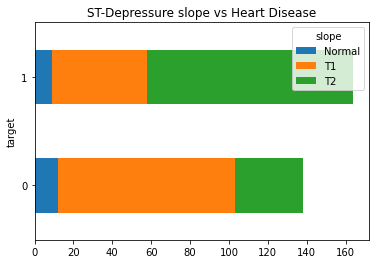

In [26]:
data.groupby(['target', 'slope']).size().unstack().plot(kind='barh', stacked=True, title="ST-Depressure slope vs Heart Disease")

**6. Will Rest ECG Level increase the incidence of heart disease**

Heart disease patient have Level-1 ECG level. 

<AxesSubplot:title={'center':'Rest-ECG vs Heart Disease'}, xlabel='target'>

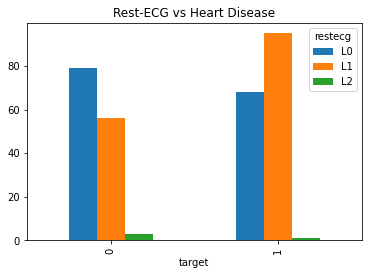

In [27]:
data.groupby(['target', 'restecg']).size().unstack().plot(kind='bar', title="Rest-ECG vs Heart Disease")

<AxesSubplot:title={'center':'Rest-ECG vs Heart Disease'}, xlabel='target'>

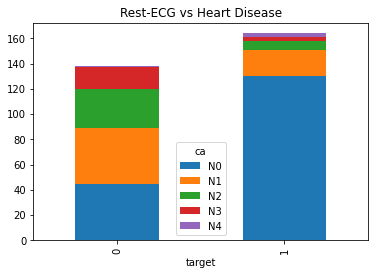

In [28]:
data.groupby(['target', 'ca']).size().unstack().plot(kind='bar', stacked=True, title="Rest-ECG vs Heart Disease")

**7. Cholesterol and heart disease?**

Cholesterol does not have siginificant difference between healthy and heart disease people.

Text(0.5, 1.0, 'Cholesterol VS Heart Disease')

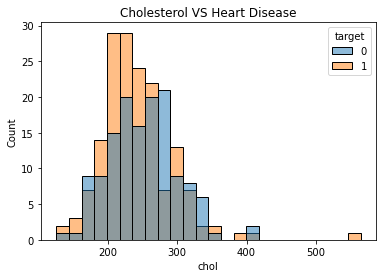

In [29]:
sns.histplot(data=data, x='chol', hue='target')
plt.title('Cholesterol VS Heart Disease')

# Conclusion of EDA

In conclusion, younger people have a higher probability of being diagnosed with heart disease, especially for patients who experience Type 1, 2, 3 chest pain. Besides, the slope of ST depression shows a significant relationship with heart disease patients. People with T2-slope has a higher chance for been diagnosed with heart disease. Moreover, if no significant vessel has been detecting through fluoroscopy, which might indicate that the patients has higher chance having heart disease. People who have an N4-ECG pattern is probably heart disease patient. 

# Machine Learning

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [35]:
features = pd.get_dummies(data.iloc[:, data.columns != 'target'])
label = data['target']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42, test_size=0.3)

## Linear based machine learning model

In [89]:
lr_model = LogisticRegressionCV(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(f"{classification_report(y_pred, y_test)}")
print(f" (tn, fp, fn, tp) = {confusion_matrix(y_pred, y_test).ravel()}")

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        46
           1       0.86      0.93      0.89        45

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

 (tn, fp, fn, tp) = [39  7  3 42]


In [90]:
print(f'Training score: {lr_model.score(X_train, y_train)}')
print(f'Testing score: {lr_model.score(X_test, y_test)}')

Training score: 0.8625592417061612
Testing score: 0.8901098901098901


## Tree-based machine learning model

In [93]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)
y_pred_dc = dc_model.predict(X_test)
print(f"{classification_report(y_pred_dc, y_test)}")
print(f" (tn, fp, fn, tp) = {confusion_matrix(y_pred_dc, y_test).ravel()}")

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        48
           1       0.71      0.81      0.76        43

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

 (tn, fp, fn, tp) = [34 14  8 35]


In [92]:
print(f'Training score: {dc_model.score(X_train, y_train)}')
print(f'Testing score: {dc_model.score(X_test, y_test)}')

Training score: 1.0
Testing score: 0.7912087912087912


## Machine Learning Task Conclusion

For this dataset, we are trying to predict the patient have heart disease or not. Hence, lower false negative value is better. As a result, it shows that simple logistic regression has better result compare to decision tree. The accuracy is around 0.89 for logistic regression model and up to 0.95 recall rate, which means this model can predict 95% of patient who truly have heart disease correctly. 

On the other hand, the result shows that decision tree had overfitted to the training dataset, which lead to poor performance for predict the testing dataset. Besides, decision tree model have lower recall and F1 score.

In conclusion, for this dataset predicting heart disease patient, the best model is to used the simple logistic regression model, higher accuracy, recall and F1-score. 